<a href="https://colab.research.google.com/github/vaishnavi764/product-rating-predictionh5/blob/main/regression_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing packages
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading dataset
df = pd.read_csv('/content/drive/MyDrive/dataset/Product_Rating_Prediction.csv')
df.head()

,Product_ID,Product_Name,Category,Price,Brand,Review_Count,Rating,Review_Text,Return_Frequency,Shipping_Days
0,cb223db3-ca1d-45e2-924d-ce4eac92e93e,room,Clothing,304.068579,Brand_A,9523,3.877066,Management rule teach edge find reason.,0.074154,2
1,60e038da-6967-4383-b153-84c46def1477,student,Clothing,NaN,Brand_D,4320,1.567270,Second lot performance small action himself tr...,0.577557,3
2,bca314fe-d5bb-49c0-86df-f4f6d82ba71b,size,Food,436.448755,Brand_C,2408,3.973797,Rich likely nice identify discussion us small.,0.131515,2
3,a1f708dc-ca7b-48b7-a865-f5bd6a094919,beautiful,Home Appliances,359.054743,Brand_D,6377,2.289967,Similar whole sport notice shoulder shake.,0.626778,13
4,56c716a9-a9db-4e5e-afe9-cb3a3e2a7f1b,like,Home Appliances,394.132629,Brand_C,8745,4.859640,Still worry it research where.,0.053312,8


In [ ]:
# See the no. of rows and columns
df.shape

(955, 10)

In [ ]:
#printing all columns
data_cols = df.columns.tolist()
print(data_cols)

['Product_ID', 'Product_Name', 'Category', 'Price', 'Brand', 'Review_Count', 'Rating', 'Review_Text', 'Return_Frequency', 'Shipping_Days']


In [ ]:
# Display data type of each feature
df.dtypes

,0
Product_ID,object
Product_Name,object
Category,object
Price,float64
Brand,object
Review_Count,int64
Rating,float64
Review_Text,object
Return_Frequency,float64
Shipping_Days,int64


In [ ]:
df.describe()

,Price,Review_Count,Rating,Return_Frequency,Shipping_Days
count,883.000000,955.000000,910.000000,955.000000,955.000000
mean,254.419872,4982.704712,2.904092,0.504968,7.375916
std,137.797148,2894.697508,1.154341,0.295861,4.085056
min,10.402665,4.000000,1.004074,0.000603,1.000000
25%,134.166079,2474.000000,1.900606,0.240110,4.000000
50%,247.927632,5161.000000,2.813807,0.507785,7.000000
75%,371.545940,7373.000000,3.927154,0.768905,11.000000
max,499.894784,9992.000000,4.999326,0.999740,14.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_ID        955 non-null    object 
 1   Product_Name      955 non-null    object 
 2   Category          896 non-null    object 
 3   Price             883 non-null    float64
 4   Brand             955 non-null    object 
 5   Review_Count      955 non-null    int64  
 6   Rating            910 non-null    float64
 7   Review_Text       955 non-null    object 
 8   Return_Frequency  955 non-null    float64
 9   Shipping_Days     955 non-null    int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 74.7+ KB


In [ ]:
# find the null values
df.isnull().sum()

,0
Product_ID,0
Product_Name,0
Category,59
Price,72
Brand,0
Review_Count,0
Rating,45
Review_Text,0
Return_Frequency,0
Shipping_Days,0


In [ ]:
# Remove unwanted columns
df.drop(columns=[ 'Product_ID'], inplace=True)  # specify the columns to remove

In [ ]:
# Fill numerical columns with mean and categorical columns with the mode
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['object']).columns
cat_columns


Index(['Product_Name', 'Category', 'Brand', 'Review_Text'], dtype='object')

In [ ]:
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())  # numerical columns
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])  # categorical columns

In [ ]:
# fill the missing values for numerical terms - mean
#df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [ ]:
# fill the missing values for categorical terms - mode
#df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])

In [ ]:
# find the null values
df.isnull().sum()

,0
Product_Name,0
Category,0
Price,0
Brand,0
Review_Count,0
Rating,0
Review_Text,0
Return_Frequency,0
Shipping_Days,0


In [ ]:
# Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df.head()

,Product_Name,Category,Price,Brand,Review_Count,Rating,Review_Text,Return_Frequency,Shipping_Days
0,450,1,304.068579,0,9523,3.877066,449,0.074154,2
1,513,1,254.419872,3,4320,1.567270,696,0.577557,3
2,481,3,436.448755,2,2408,3.973797,671,0.131515,2
3,61,4,359.054743,3,6377,2.289967,731,0.626778,13
4,290,4,394.132629,2,8745,4.859640,780,0.053312,8


In [ ]:
# Scale numerical features with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

In [ ]:
# Split data into train and test sets
# replace 'target_column' with your target column name
X = df.drop('Rating', axis=1)  # -- independent variable
y = df['Rating'] # -- dependent variable
X


,Product_Name,Category,Price,Brand,Review_Count,Review_Text,Return_Frequency,Shipping_Days
0,450,1,0.599940,0,0.953044,449,0.073615,0.076923
1,513,1,0.498511,3,0.432119,696,0.577453,0.153846
2,481,3,0.870384,2,0.240689,671,0.131025,0.076923
3,61,4,0.712273,3,0.638066,731,0.626716,0.923077
4,290,4,0.783935,2,0.875150,780,0.052755,0.538462
...,...,...,...,...,...,...,...,...
950,282,3,0.471241,3,0.445034,835,0.930113,0.076923
951,199,1,0.884529,0,0.944533,733,0.017140,0.230769
952,251,4,0.035912,0,0.990489,453,0.592833,0.307692
953,456,3,0.690196,1,0.274529,759,0.545710,0.230769


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Logistic Regression model
from sklearn.linear_model import LinearRegression
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Evaluate Logistic Regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
linreg_pred = linreg_model.predict(X_test)
# Evaluation metrics
linreg_mse = mean_squared_error(y_test, linreg_pred)
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)

In [ ]:
print(f'Mean Squared Error: {linreg_mse}')
print(f'Mean Absolute Error: {linreg_mae}')
print(f'R-squared: {linreg_r2}')

Mean Squared Error: 0.07488091348732118
Mean Absolute Error: 0.2263747639460487
R-squared: 0.02728502190491877


In [ ]:
#Train Random Forest Classifier model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Evaluate Random Forest Classifier model
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [ ]:
print(f'Mean Squared Error: {rf_mse}')
print(f'Mean Absolute Error: {rf_mae}')
print(f'R-squared: {rf_r2}')

Mean Squared Error: 0.07672498166497317
Mean Absolute Error: 0.23046282869433454
R-squared: 0.0033302829268170298


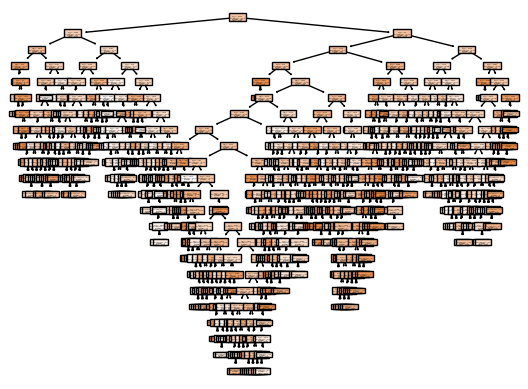

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [ ]:
# Select the best model
best_model = linreg_model if linreg_mse < rf_mse else rf_model

In [ ]:
# Save the best model as a .pkl file
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'
